In [2]:
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [3]:
BASE_DIR = "/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/preunfolded_2017/Nominal/emu"

In [4]:
b1k_preunfolded = uproot.open(BASE_DIR + "/b1k.root", flow=True)

In [5]:
b1k_preunfolded.keys()

['b1kData;1',
 'b1kGen;1',
 'b1kVisGen;1',
 'b1kReco;1',
 'b1kRecoBg;1',
 'b1kRespMat;1']

### Project out the axes

In [6]:
b1k_preunfolded["b1kRespMat"].to_hist()

Hist(
  Regular(24, 0.5, 24.5, name='xaxis', label='ttbargen'),
  Regular(48, 0.5, 48.5, name='yaxis', label='ttbarreco'),
  storage=Weight()) # Sum: WeightedSum(value=175195, variance=2736.7) (WeightedSum(value=1.10548e+06, variance=19053.6) with flow)

In [7]:
b1k_preunfolded["b1kRespMat"].to_hist().project('xaxis')

Hist(Regular(24, 0.5, 24.5, name='xaxis', label='ttbargen'), storage=Weight()) # Sum: WeightedSum(value=1.10548e+06, variance=19053.6) (WeightedSum(value=1.10548e+06, variance=19053.6) with flow)

In [8]:
b1k_preunfolded["b1kRespMat"].to_hist().project('yaxis')

Hist(Regular(48, 0.5, 48.5, name='yaxis', label='ttbarreco'), storage=Weight()) # Sum: WeightedSum(value=175195, variance=2736.7) (WeightedSum(value=1.10548e+06, variance=19053.6) with flow)

## Compare bin by bin contents

### Gen 

In [9]:
gen_from_projection = b1k_preunfolded["b1kRespMat"].to_hist().project('xaxis').to_numpy()[0]
gen_from_projection

array([43526.09745661, 44482.88366244, 45230.69060181, 45739.42002838,
       46068.85228248, 46412.48332424, 46617.97656962, 46748.01714009,
       46879.89572789, 46982.44275164, 46971.69631464, 47036.20604294,
       47124.89478515, 46971.69631464, 46982.40906324, 46879.92941629,
       46748.01714009, 46617.962732  , 46412.49716186, 46068.85228248,
       45739.38743349, 45230.72319669, 44482.88366244, 43526.08119142])

In [10]:
gen_from_histogram = b1k_preunfolded["b1kGen"].to_numpy()[0]
gen_from_histogram

array([46079.81786884, 46049.39468842, 46056.32943171, 46038.91096291,
       46029.08030652, 46095.57399503, 46075.31837209, 46043.90488562,
       46093.79879347, 46052.72544891, 46023.54982754, 46092.44016047,
       46092.44016047, 46023.54982754, 46052.70860471, 46093.81563767,
       46043.90488562, 46075.30453447, 46095.58783265, 46029.08030652,
       46038.87577385, 46056.36462078, 46049.39468842, 46079.78216838])

In [14]:
gen_from_projection == gen_from_histogram

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [15]:
delta_gen = np.divide((gen_from_projection - gen_from_histogram), gen_from_histogram)
delta_gen = abs(delta_gen) * 100
delta_gen 

array([5.54194988, 3.4018059 , 1.7926718 , 0.65051698, 0.08640619,
       0.6875049 , 1.17776332, 1.52921924, 1.70542883, 2.0188106 ,
       2.06013332, 2.04755027, 2.23996521, 2.06013332, 2.01877476,
       1.70546475, 1.52921924, 1.17776367, 0.68750469, 0.08640619,
       0.65051185, 1.79267606, 3.4018059 , 5.541912  ])

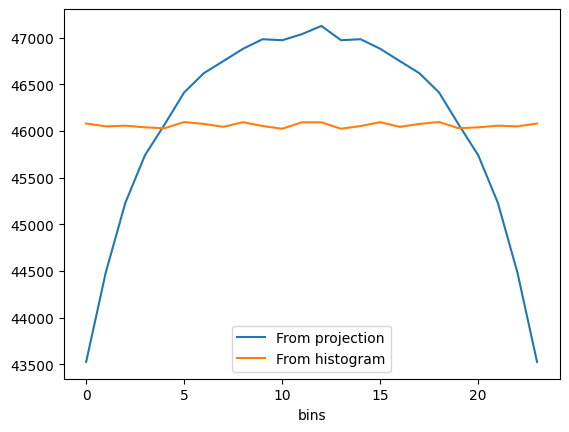

In [16]:
plt.plot(gen_from_projection, label="From projection")
plt.plot(gen_from_histogram , label="From histogram")
plt.xlabel("bins")
plt.legend()

(0.94, 1.04)

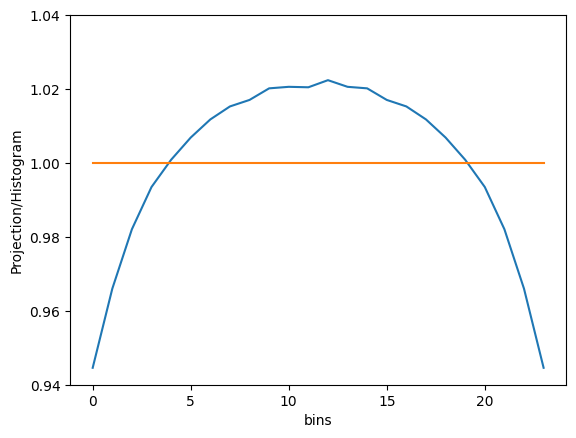

In [17]:
plt.plot(np.divide(gen_from_projection, gen_from_histogram))
plt.plot(np.ones(len(gen_from_projection)))
plt.ylabel("Projection/Histogram")
plt.xlabel("bins")
plt.ylim(0.94,1.04)

In [20]:
ratio = np.divide(gen_from_projection, gen_from_histogram)
# len(np.divide(gen_from_projection, gen_from_histogram))

In [45]:
np.mean(ratio[20:])

0.9715327354792724

In [25]:
rebinned_ratio = [np.mean(ratio[4*i:4*i+4]) for i in range(6)]

In [41]:
rebinned_ratio 

[0.9715326385832592,
 1.0087022341303373,
 1.0195798075624691,
 1.020060845124994,
 1.008702234498658,
 0.9715327354792724]

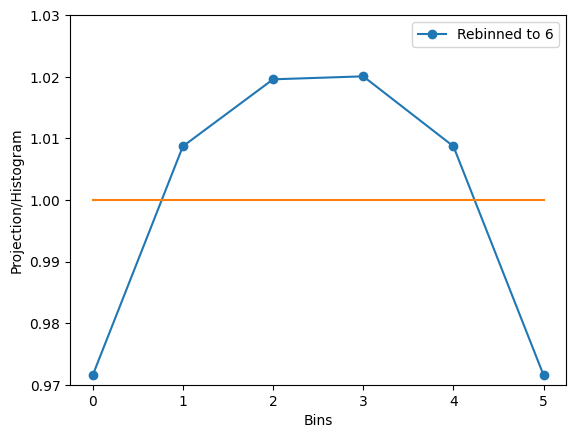

In [33]:
#plt.plot(ratio)
plt.plot(rebinned_ratio, label= "Rebinned to 6", marker="o")
plt.plot(np.ones(len(rebinned_ratio)))
plt.ylabel("Projection/Histogram")
plt.xlabel("Bins")
plt.ylim(0.97,1.03)
plt.legend()

In [16]:
sum(delta_gen)/ len(delta_gen)

1.8996624542321197

### Reco

In [17]:
reco_from_projection = b1k_preunfolded["b1kRespMat"].to_hist().project('yaxis').to_numpy()[0]
reco_from_projection

array([3414.03957504, 3437.25249475, 3486.41942584, 3534.46099852,
       3570.63313265, 3601.84213324, 3624.84877372, 3645.23449112,
       3679.44277292, 3683.44938543, 3708.08629643, 3716.55620046,
       3692.79384269, 3709.53779189, 3709.1055614 , 3709.83149252,
       3713.82148135, 3723.46136941, 3707.68998458, 3708.90028747,
       3710.75055382, 3702.21873031, 3707.34027562, 3699.6844748 ,
       3699.6844748 , 3707.34027562, 3702.21873031, 3710.75055382,
       3708.90028747, 3707.68998458, 3723.46136941, 3713.82148135,
       3709.81677204, 3709.12028189, 3709.53779189, 3692.79384269,
       3716.55620046, 3708.08629643, 3683.42024649, 3679.47191187,
       3645.23449112, 3624.84877372, 3601.84213324, 3570.63313265,
       3534.46099852, 3486.41942584, 3437.25249475, 3414.03957504])

In [18]:
reco_from_histogram = b1k_preunfolded["b1kReco"].to_numpy()[0]
reco_from_histogram

array([3416.54374797, 3439.81623879, 3488.98763807, 3537.47173141,
       3573.51030926, 3604.90900685, 3627.78134345, 3648.50003309,
       3682.37700982, 3686.04608477, 3711.10509923, 3719.48123789,
       3695.26349734, 3712.2379838 , 3711.68259434, 3712.31710443,
       3716.32792471, 3725.68856306, 3709.96151998, 3711.21792687,
       3712.76436225, 3704.53245854, 3709.59626684, 3701.84208129,
       3701.84208129, 3709.59626684, 3704.53245854, 3712.76436225,
       3711.21792687, 3709.96151998, 3725.68856306, 3716.32792471,
       3712.30238395, 3711.69731482, 3712.2379838 , 3695.26349734,
       3719.48123789, 3711.10509923, 3686.01694582, 3682.40614877,
       3648.50003309, 3627.78134345, 3604.90900685, 3573.51030926,
       3537.47173141, 3488.98763807, 3439.81623879, 3416.54374797])

In [19]:
reco_from_projection == reco_from_histogram

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
delta_reco = np.divide((reco_from_projection - reco_from_histogram), reco_from_histogram)
delta_reco = abs(delta_reco) * 100
delta_reco

array([0.0732955 , 0.07453142, 0.0736091 , 0.08510974, 0.08051401,
       0.08507492, 0.08083645, 0.08950368, 0.07968323, 0.07044674,
       0.08134512, 0.078641  , 0.06683298, 0.07273758, 0.06943032,
       0.06695581, 0.06744408, 0.05977938, 0.061228  , 0.06244956,
       0.05424014, 0.06245669, 0.06081501, 0.05828467, 0.05828467,
       0.06081501, 0.06245669, 0.05424014, 0.06244956, 0.061228  ,
       0.05977938, 0.06744408, 0.06695607, 0.06943004, 0.07273758,
       0.06683298, 0.078641  , 0.08134512, 0.0704473 , 0.0796826 ,
       0.08950368, 0.08083645, 0.08507492, 0.08051401, 0.08510974,
       0.0736091 , 0.07453142, 0.0732955 ])

In [21]:
sum(delta_reco)/ len(delta_reco)

0.07146854584508748

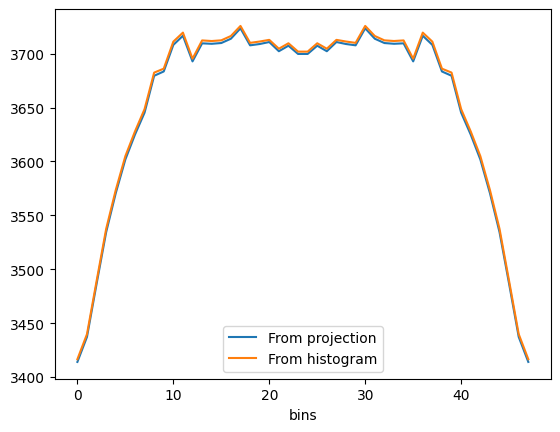

In [22]:
plt.plot(reco_from_projection, label="From projection")
plt.plot(reco_from_histogram , label="From histogram")
plt.xlabel("bins")
plt.legend()

(0.99, 1.01)

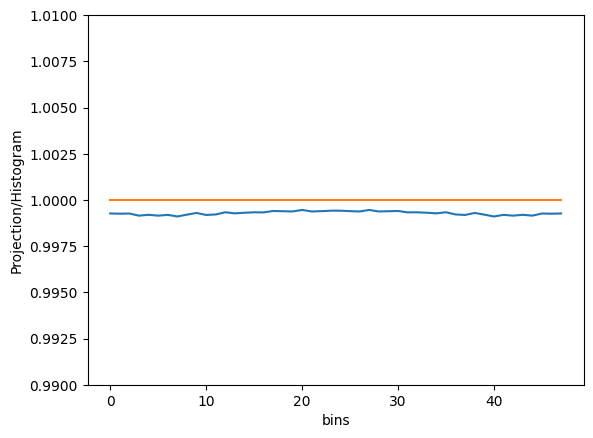

In [23]:
plt.plot(np.divide(reco_from_projection, reco_from_histogram))
plt.plot(np.ones(len(reco_from_projection)))
plt.ylabel("Projection/Histogram")
plt.xlabel("bins")
plt.ylim(0.99,1.01)

In [24]:
RespMat = b1k_preunfolded["b1kRespMat"].to_hist()

/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(
/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(


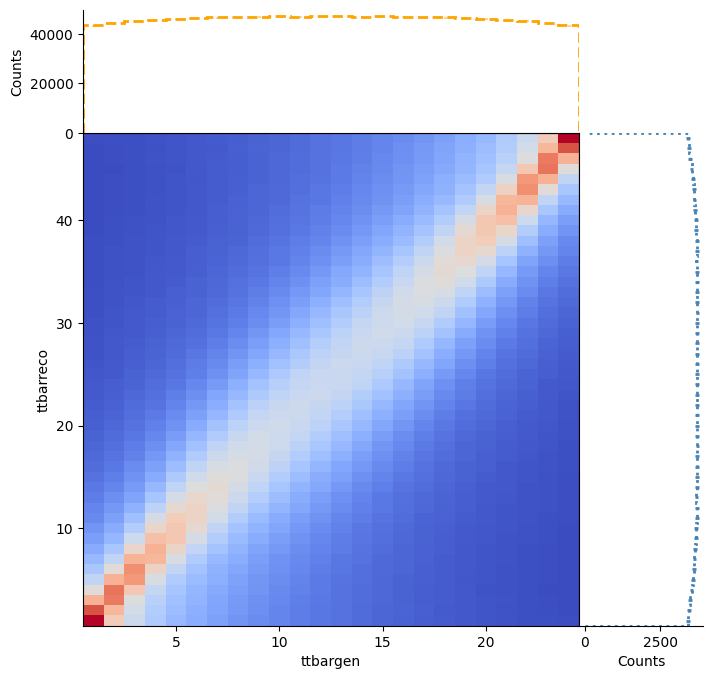

In [25]:
# plot2d_full
plt.figure(figsize=(8, 8))

RespMat.plot2d_full(
    main_cmap="coolwarm",
    top_ls="--",
    top_color="orange",
    top_lw=2,
    side_ls=":",
    side_lw=2,
    side_color="steelblue",
)

plt.show()

In [27]:
fileptr = uproot.open("/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/UnfoldingHistos_2017/Nominal/emu/histosTUnfold_emu_ttbarsignalviatau_fromDilepton_2017UL.root", flow=True)

In [28]:
hreco_b1k = fileptr["hreco_b1k"].to_hist()
hreco_b1k

Hist(Regular(48, 0.5, 48.5, name='xaxis', label='ttbarreco'), storage=Weight()) # Sum: WeightedSum(value=5.16707e+07, variance=1.73421e+09)

In [29]:
hgen_b1k = fileptr["hgen_b1k"].to_hist()
hgen_b1k

Hist(Regular(24, 0.5, 24.5, name='xaxis', label='ttbargen'), storage=Weight()) # Sum: WeightedSum(value=6.51832e+08, variance=2.39927e+10)

In [30]:
hrecovsgen_b1k = fileptr["hrecoVsgen_b1k"].to_hist()
hrecovsgen_b1k

Hist(
  Regular(24, 0.5, 24.5, name='xaxis', label='ttbargen'),
  Regular(48, 0.5, 48.5, name='yaxis', label='ttbarreco'),
  storage=Weight()) # Sum: WeightedSum(value=5.1597e+07, variance=1.73171e+09) (WeightedSum(value=6.51631e+08, variance=2.39792e+10) with flow)

In [31]:
hrecovsgen_b1k.project('xaxis')

Hist(Regular(24, 0.5, 24.5, name='xaxis', label='ttbargen'), storage=Weight()) # Sum: WeightedSum(value=6.51631e+08, variance=2.39792e+10)

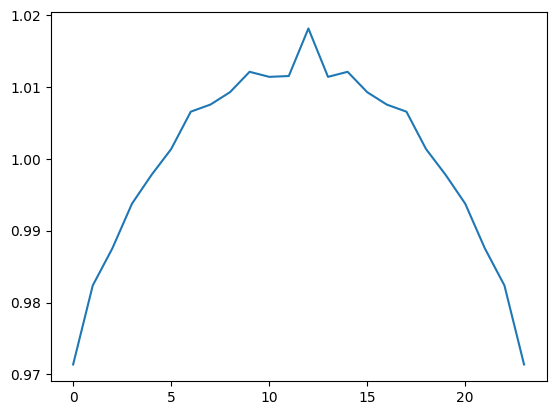

In [32]:
plt.plot(np.divide(hrecovsgen_b1k.project('xaxis').to_numpy()[0], hgen_b1k.to_numpy()[0]))